<a href="https://colab.research.google.com/github/DDD86/Analytics_project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Загрузка данных

In [2]:
df = pd.read_csv("data.csv")
df.head()

,Month,Sales
0,Jan,200
1,Feb,220
2,Mar,250
3,Apr,270
4,May,300


### Создание нового столбца в DataFrame df, который содержит числовые значения для каждого месяца, начиная с 1 и заканчивая количеством месяцев в вашем наборе данных. Это позволяет использовать числовые значения для построения модели линейной регрессии.

In [3]:
df['Month_num'] = np.arange(1, len(df) + 1)

### Расчет средних продаж и вывод результата

In [4]:
average_sales = df['Sales'].mean()
print(f'Средние продажи: {average_sales}')

Средние продажи: 335.0


###  Создается график, который визуализирует данные о продажах по месяцам

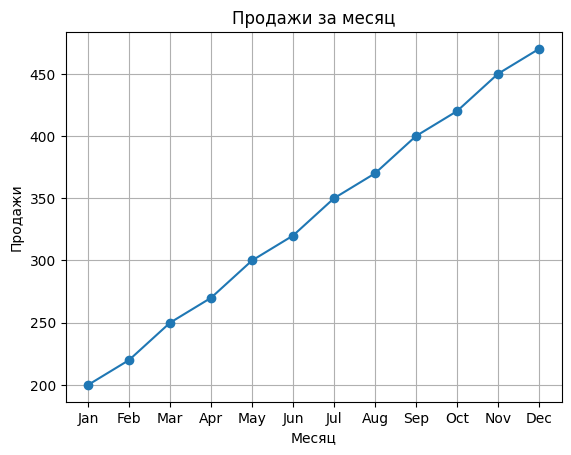

In [9]:
plt.plot(df['Month'], df['Sales'], marker='o')
plt.title('Продажи за месяц')
plt.xlabel('Месяц')
plt.ylabel('Продажи')
plt.grid(True)
plt.show()

### Создание DataFrame для будущих месяцев, предсказание продаж на следующие месяцы и печать прогнозов

In [6]:
# Разделение данных на признаки (X) и метки (y)
X = df[['Month_num']]
y = df['Sales']

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X, y)

# Создание DataFrame для будущих месяцев
future_months_df = pd.DataFrame({'Month_num': [13, 14, 15]})

# Предсказание продаж на следующие месяцы
predicted_sales = model.predict(future_months_df)

# Печать прогнозов
print("Прогнозируемые продажи на следующие месяцы:", predicted_sales)

Прогнозируемые продажи на следующие месяцы: [496.81818182 521.71328671 546.60839161]


### Прогнозирование, расчет среднеквадратичной ошибки (MSE), расчет коэффициента детерминации (R²) и вывод результатов

In [7]:
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'MSE: {mse}, R²: {r2}')

MSE: 6.118881118881107, R²: 0.9991721919568594


### Создается график, который визуализирует фактические и прогнозируемые продажи

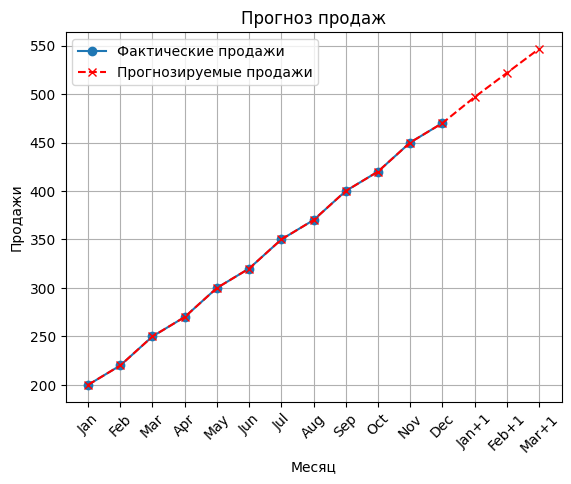

In [11]:
# Построение графика с прогнозируемыми значениями
plt.plot(df['Month_num'], df['Sales'], marker='o', label='Фактические продажи')
plt.plot(np.arange(1, 16), np.concatenate([df['Sales'], predicted_sales]), linestyle='--', marker='x', label='Прогнозируемые продажи', color='red')
plt.title('Прогноз продаж')
plt.xlabel('Месяц')
plt.ylabel('Продажи')

# Исправление количества меток
months_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan+1', 'Feb+1', 'Mar+1', 'Apr+1']
plt.xticks(np.arange(1, 16), months_labels[:15], rotation=45)  # Убедитесь, что количество меток соответствует количеству позиций

plt.legend()
plt.grid(True)
plt.show()